# 데이터 / 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
%matplotlib inline

rc('font',family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 매출데이터 불러오기

In [2]:
sale=pd.read_csv('8)sale.csv',encoding='cp949')
sale

,연분기,행정동코드,동이름,업종코드,업종명,당월매출,당월매출건수,주중매출,주말매출,월요일매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20221,11110515,청운효자동,CS100001,한식음식점,3.015376e+09,115548,2.222314e+09,793062463.0,425159717.0,...,36039,2410,56059,50754,1172,25533,25588,19737,19417,15363
1,20221,11110515,청운효자동,CS100002,중식음식점,4.268588e+07,2382,3.534773e+07,7338157.0,6851542.0,...,0,0,1447,661,6,123,624,565,500,292
2,20221,11110515,청운효자동,CS100003,일식음식점,2.114213e+08,9598,1.484023e+08,63019039.0,13978529.0,...,2841,25,3671,5545,273,3911,2137,1182,1348,366
3,20221,11110515,청운효자동,CS100004,양식음식점,1.896393e+09,36013,1.125549e+09,770843562.0,136910365.0,...,15377,1437,11566,22746,327,15017,10687,3360,3611,1308
4,20221,11110515,청운효자동,CS100005,제과점,9.243973e+08,68768,5.065089e+08,417888351.0,69873730.0,...,16359,626,23135,44533,403,19145,19147,13144,10393,5436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101699,20232,11740700,둔촌2동,CS300029,애완동물,2.310953e+08,7005,1.495734e+08,81521901.0,33774326.0,...,3041,375,3335,3530,0,506,1466,1106,2049,1739
101700,20232,11740700,둔촌2동,CS300031,가구,3.607156e+07,51,1.993185e+07,16139714.0,12948766.0,...,22,0,28,23,0,0,23,14,5,9
101701,20232,11740700,둔촌2동,CS300033,철물점,1.415857e+08,1558,1.067220e+08,34863639.0,33986419.0,...,196,0,533,689,0,82,243,273,270,355
101702,20232,11740700,둔촌2동,CS300035,인테리어,2.508802e+06,139,2.508802e+06,0.0,2508802.0,...,0,0,0,139,0,0,0,0,139,0


# 데이터 검토, 전처리

## 중구 데이터만 추출

In [3]:
#성북구만 추출
sale['행정동코드']=sale['행정동코드'].astype(str)

sale_중구=sale[sale['행정동코드'].str.startswith('11590')]

## 연분기 2023년 1월 데이터만 추출

In [4]:
#성북구 연분기 20231만 추출
salae_중구=sale_중구[sale_중구['연분기']==20231]
sale_중구

,연분기,행정동코드,동이름,업종코드,업종명,당월매출,당월매출건수,주중매출,주말매출,월요일매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
11936,20221,11590510,노량진1동,CS100001,한식음식점,6.710909e+09,324290,4.312497e+09,2.398412e+09,856131779.0,...,124643,14866,204369,115717,2592,102132,81497,35326,64958,33589
11937,20221,11590510,노량진1동,CS100002,중식음식점,1.902245e+08,13004,1.339879e+08,5.623662e+07,22543023.0,...,4708,410,7522,5373,472,4452,2812,1707,2503,944
11938,20221,11590510,노량진1동,CS100003,일식음식점,1.270703e+08,10076,8.779446e+07,3.927586e+07,11438953.0,...,3560,88,5166,4859,120,4236,2510,894,1617,648
11939,20221,11590510,노량진1동,CS100004,양식음식점,2.756223e+08,15907,1.691186e+08,1.065037e+08,10215381.0,...,5942,631,8683,7000,221,4609,4100,2284,3266,1204
11940,20221,11590510,노량진1동,CS100005,제과점,5.198850e+08,66437,3.899194e+08,1.299656e+08,76989597.0,...,23168,7114,27800,37514,555,18379,15206,10339,12468,8361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97353,20232,11590680,신대방2동,CS300022,화장품,7.761906e+08,32684,5.306945e+08,2.454962e+08,121453213.0,...,11898,3110,7884,24800,314,10006,10799,6029,3861,1675
97354,20232,11590680,신대방2동,CS300028,화초,1.252109e+07,472,7.908248e+06,4.612844e+06,2972838.0,...,174,50,141,281,0,58,25,91,91,158
97355,20232,11590680,신대방2동,CS300033,철물점,6.558582e+06,355,5.587140e+06,9.714420e+05,1987806.0,...,0,0,147,59,0,0,59,29,81,37
97356,20232,11590680,신대방2동,CS300036,조명용품,4.544036e+06,401,3.386250e+06,1.157786e+06,951740.0,...,98,0,254,147,0,20,79,58,175,69


In [5]:
sale_중구['동이름'].unique()

array(['노량진1동', '노량진2동', '상도1동', '상도2동', '상도3동', '상도4동', '흑석동', '사당1동',
       '사당2동', '사당3동', '사당4동', '사당5동', '대방동', '신대방1동', '신대방2동'],
      dtype=object)

In [6]:
sale_중구['업종명'].value_counts()[:10] #중구의 인기 업종이 무엇인지확인

업종명
한식음식점     90
일반교습학원    90
세탁소       90
편의점       90
미용실       90
일반의류      90
의약품       90
일반의원      90
예술학원      90
슈퍼마켓      90
Name: count, dtype: int64

## 업종은 편의점 데이터 추출

In [7]:
중구커피=sale_중구[sale_중구['업종명']=='편의점']
중구커피

,연분기,행정동코드,동이름,업종코드,업종명,당월매출,당월매출건수,주중매출,주말매출,월요일매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
11965,20221,11590510,노량진1동,CS300002,편의점,5.977756e+09,1261308,4.412041e+09,1.565715e+09,9.135822e+08,...,338813,197938,823094,437923,12562,537256,352792,96656,209036,52717
12007,20221,11590520,노량진2동,CS300002,편의점,2.744834e+09,515610,1.963457e+09,7.813769e+08,4.030375e+08,...,137280,100468,331779,183831,9179,192421,131892,54624,90968,36526
12048,20221,11590530,상도1동,CS300002,편의점,8.863394e+09,1264327,6.490117e+09,2.373277e+09,1.284406e+09,...,364369,280276,764958,499369,30225,449742,301529,226521,166261,90049
12094,20221,11590540,상도2동,CS300002,편의점,1.237491e+09,181467,8.814161e+08,3.560751e+08,1.821602e+08,...,50112,38140,119997,61470,6438,53576,50629,32688,25040,13096
12135,20221,11590550,상도3동,CS300002,편의점,8.285304e+08,111897,5.776283e+08,2.509021e+08,1.195948e+08,...,33996,25732,70755,41142,3040,28531,31286,23727,18026,7287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97202,20232,11590650,사당4동,CS300002,편의점,9.726150e+08,155389,6.852875e+08,2.873275e+08,1.429825e+08,...,42319,31142,99548,55841,3495,41460,48373,30754,20498,10809
97227,20232,11590651,사당5동,CS300002,편의점,5.377430e+08,88786,3.774624e+08,1.602806e+08,7.345951e+07,...,24027,20708,54040,34746,2176,21664,26150,16452,14543,7801
97264,20232,11590660,대방동,CS300002,편의점,3.729555e+09,619155,2.672862e+09,1.056693e+09,5.189006e+08,...,165294,119703,370044,248119,37360,143788,152778,134952,112668,36618
97305,20232,11590670,신대방1동,CS300002,편의점,1.966512e+09,344506,1.394599e+09,5.719131e+08,2.659245e+08,...,93354,69971,192655,151851,6436,100632,108903,54950,52245,21340


# 행정동별 생활인구데이터 불러오기

In [8]:
dong_pop=pd.read_excel('생활인구데이터.xlsx')
dong_pop

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,811.8566,862.1507,873.9038,667.0151,1019.9621,960.8058,1075.1081,1002.6932,762.4476,2039.5830
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,882.1717,927.3364,1005.0317,893.7216,1086.5414,1096.7991,1067.6682,1057.3139,710.7672,1851.1231
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,384.1645,297.1103,374.7113,399.9091,368.0235,307.4670,208.6892,136.8860,132.3833,351.7992
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,1424.8983,1313.0002,1459.8118,1387.5974,1475.8228,1340.9569,1648.9524,1492.2480,1298.7019,3098.5651
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,592.8334,502.8279,614.1144,637.1190,1082.4648,831.0457,803.1677,574.2480,437.7856,1088.3779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,705.3973,672.4282,793.7318,755.7376,909.3189,689.4435,773.8896,749.0588,573.7800,1694.6262
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,369.4881,426.8944,825.1702,1075.5930,1122.3634,715.4737,641.2286,423.3113,401.6018,1097.1644
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1212.6021,1148.9860,1311.5816,1414.4604,1862.3325,1245.7462,886.7439,632.8622,441.0081,1025.4172
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,525.8059,513.0067,495.9601,469.5965,485.6948,535.5495,581.4097,495.3314,468.5594,1203.8335


# 데이터 검토, 전처리

In [9]:
dong_pop['행정동코드']=dong_pop['행정동코드'].astype(str)

In [10]:
dong_pop.isna().sum()

기준일ID              0
시간대구분              0
행정동코드              0
총생활인구수             0
남자0세부터9세생활인구수      0
남자10세부터14세생활인구수    0
남자15세부터19세생활인구수    0
남자20세부터24세생활인구수    0
남자25세부터29세생활인구수    0
남자30세부터34세생활인구수    0
남자35세부터39세생활인구수    0
남자40세부터44세생활인구수    0
남자45세부터49세생활인구수    0
남자50세부터54세생활인구수    0
남자55세부터59세생활인구수    0
남자60세부터64세생활인구수    0
남자65세부터69세생활인구수    0
남자70세이상생활인구수       0
여자0세부터9세생활인구수      0
여자10세부터14세생활인구수    0
여자15세부터19세생활인구수    0
여자20세부터24세생활인구수    0
여자25세부터29세생활인구수    0
여자30세부터34세생활인구수    0
여자35세부터39세생활인구수    0
여자40세부터44세생활인구수    0
여자45세부터49세생활인구수    0
여자50세부터54세생활인구수    0
여자55세부터59세생활인구수    0
여자60세부터64세생활인구수    0
여자65세부터69세생활인구수    0
여자70세이상생활인구수       0
dtype: int64

In [11]:
#청년층 남성 그룹 (20 ~ 39세 그룹은 4개의 피처)
dong_pop['청년층(남성)']=(dong_pop['남자20세부터24세생활인구수']
                     +dong_pop['남자25세부터29세생활인구수']+\
dong_pop['남자30세부터34세생활인구수']+dong_pop['남자35세부터39세생활인구수'])/4

#청년층 남성 그룹 (40 ~ 59세 그룹은 4개의 피처)
dong_pop['중년층(남성)']=(dong_pop['남자40세부터44세생활인구수']+
                     dong_pop['남자45세부터49세생활인구수']+
                     dong_pop['남자50세부터54세생활인구수']+\
dong_pop['남자55세부터59세생활인구수'])/4
           
#노년층 남성 그룹 (60세 ~ 그 이상의 그룹은 3개의 피처)
dong_pop['노년층(남성)']=(dong_pop['남자60세부터64세생활인구수']+
                     dong_pop['남자65세부터69세생활인구수']+dong_pop['남자70세이상생활인구수'])/3
dong_pop

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,청년층(남성),중년층(남성),노년층(남성)
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,667.0151,1019.9621,960.8058,1075.1081,1002.6932,762.4476,2039.5830,814.329650,860.431100,913.848567
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,893.7216,1086.5414,1096.7991,1067.6682,1057.3139,710.7672,1851.1231,847.934500,942.111875,818.095500
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,399.9091,368.0235,307.4670,208.6892,136.8860,132.3833,351.7992,432.944700,423.484425,207.548367
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,1387.5974,1475.8228,1340.9569,1648.9524,1492.2480,1298.7019,3098.5651,1474.450100,1406.742025,1393.732967
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,637.1190,1082.4648,831.0457,803.1677,574.2480,437.7856,1088.3779,538.491300,783.297700,510.652100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,755.7376,909.3189,689.4435,773.8896,749.0588,573.7800,1694.6262,1212.876750,768.056575,703.133967
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,1075.5930,1122.3634,715.4737,641.2286,423.3113,401.6018,1097.1644,405.296925,901.456375,449.681033
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1414.4604,1862.3325,1245.7462,886.7439,632.8622,441.0081,1025.4172,1128.693525,1384.159925,516.547167
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,469.5965,485.6948,535.5495,581.4097,495.3314,468.5594,1203.8335,436.402450,438.514525,468.655433


In [12]:
#청년층 여성 그룹 (20 ~ 39세 그룹은 4개의 피처)
dong_pop['청년층(여성)']=(dong_pop['여자20세부터24세생활인구수']
                     +dong_pop['여자25세부터29세생활인구수']+\
dong_pop['여자30세부터34세생활인구수']+dong_pop['남자35세부터39세생활인구수'])/4

#중년층 여성 그룹 (40 ~ 59세 그룹은 4개의 피처)
dong_pop['중년층(여성)']=(dong_pop['여자40세부터44세생활인구수']+
                     dong_pop['여자45세부터49세생활인구수']+
                     dong_pop['여자50세부터54세생활인구수']+\
dong_pop['여자55세부터59세생활인구수'])/4
           
#노년층 여성 그룹 (60세 ~ 3개 피처)
dong_pop['노년층(여성)']=(dong_pop['여자60세부터64세생활인구수']+
                     dong_pop['여자65세부터69세생활인구수']+dong_pop['여자70세이상생활인구수'])/3
dong_pop


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,청년층(남성),중년층(남성),노년층(남성),청년층(여성),중년층(여성),노년층(여성)
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,1075.1081,1002.6932,762.4476,2039.5830,814.329650,860.431100,913.848567,846.150475,930.722775,1268.241267
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,1067.6682,1057.3139,710.7672,1851.1231,847.934500,942.111875,818.095500,907.789425,1036.182575,1206.401400
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,208.6892,136.8860,132.3833,351.7992,432.944700,423.484425,207.548367,392.627925,321.022200,207.022833
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,1648.9524,1492.2480,1298.7019,3098.5651,1474.450100,1406.742025,1393.732967,1470.343325,1463.332375,1963.171667
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,803.1677,574.2480,437.7856,1088.3779,538.491300,783.297700,510.652100,554.708725,838.449300,700.137167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,773.8896,749.0588,573.7800,1694.6262,1212.876750,768.056575,703.133967,936.413450,782.097400,1005.821667
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,641.2286,423.3113,401.6018,1097.1644,405.296925,901.456375,449.681033,447.303000,888.664675,640.692500
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,886.7439,632.8622,441.0081,1025.4172,1128.693525,1384.159925,516.547167,1227.913500,1352.320750,699.762500
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,581.4097,495.3314,468.5594,1203.8335,436.402450,438.514525,468.655433,524.559900,518.062625,722.574767


In [13]:
#청년층 그룹(남성+여성)
dong_pop['청년층']=(dong_pop['청년층(남성)']+dong_pop['청년층(여성)'])/2
dong_pop['중년층']=(dong_pop['중년층(남성)']+dong_pop['중년층(여성)'])/2
dong_pop['노년층']=(dong_pop['노년층(남성)']+dong_pop['노년층(여성)'])/2
dong_pop

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자70세이상생활인구수,청년층(남성),중년층(남성),노년층(남성),청년층(여성),중년층(여성),노년층(여성),청년층,중년층,노년층
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,2039.5830,814.329650,860.431100,913.848567,846.150475,930.722775,1268.241267,830.240063,895.576937,1091.044917
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,1851.1231,847.934500,942.111875,818.095500,907.789425,1036.182575,1206.401400,877.861962,989.147225,1012.248450
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,351.7992,432.944700,423.484425,207.548367,392.627925,321.022200,207.022833,412.786313,372.253312,207.285600
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,3098.5651,1474.450100,1406.742025,1393.732967,1470.343325,1463.332375,1963.171667,1472.396713,1435.037200,1678.452317
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,1088.3779,538.491300,783.297700,510.652100,554.708725,838.449300,700.137167,546.600013,810.873500,605.394633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,1694.6262,1212.876750,768.056575,703.133967,936.413450,782.097400,1005.821667,1074.645100,775.076987,854.477817
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,1097.1644,405.296925,901.456375,449.681033,447.303000,888.664675,640.692500,426.299962,895.060525,545.186767
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1025.4172,1128.693525,1384.159925,516.547167,1227.913500,1352.320750,699.762500,1178.303512,1368.240338,608.154833
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,1203.8335,436.402450,438.514525,468.655433,524.559900,518.062625,722.574767,480.481175,478.288575,595.615100


In [14]:
age_df=dong_pop[['기준일ID','시간대구분','행정동코드','총생활인구수','청년층','중년층','노년층']]
#age_df.to_excel('age_df.xlsx', index=False)
age_df

,기준일ID,시간대구분,행정동코드,총생활인구수,청년층,중년층,노년층
0,20231001,0,11380530,22734.2529,830.240063,895.576937,1091.044917
1,20231001,0,11380631,24576.9924,877.861962,989.147225,1012.248450
2,20231001,0,11140550,9048.8135,412.786313,372.253312,207.285600
3,20231001,0,11350595,39636.1446,1472.396713,1435.037200,1678.452317
4,20231001,0,11470540,18560.2696,546.600013,810.873500,605.394633
...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,1074.645100,775.076987,854.477817
315452,20231031,23,11650570,19627.1808,426.299962,895.060525,545.186767
315453,20231031,23,11680630,30933.8632,1178.303512,1368.240338,608.154833
315454,20231031,23,11290770,12949.8318,480.481175,478.288575,595.615100


In [15]:
# 자치구코드로 그룹화하고 중복된 자치구코드의 경우 해당 열들의 값을 합산한 후 개수로 나누어 평균 구하기
grouped_df = age_df.groupby('행정동코드').agg({'총생활인구수':'sum','청년층': 'sum', 
                                          '중년층': 'sum', '노년층': 'sum',
                                          '행정동코드': 'size'})

# 중복된 자치구코드의 개수로 나누어 평균 계산
grouped_df['총생활인구'] = grouped_df['총생활인구수'] / grouped_df['행정동코드']
grouped_df['청년층생활인구'] = grouped_df['청년층'] / grouped_df['행정동코드']
grouped_df['중년층생활인구'] = grouped_df['중년층'] / grouped_df['행정동코드']
grouped_df['노년층생활인구'] = grouped_df['노년층'] / grouped_df['행정동코드']

grouped_df


,총생활인구수,청년층,중년층,노년층,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구
행정동코드,,,,,,,,,
11110515,1.363602e+07,4.497488e+05,5.400277e+05,4.449660e+05,744,18327.989952,604.501094,725.843643,598.072540
11110530,1.882916e+07,8.254156e+05,8.660868e+05,5.637366e+05,744,25308.006034,1109.429592,1164.095226,757.710443
11110540,4.527197e+06,1.996818e+05,1.859621e+05,1.475677e+05,744,6084.941765,268.389532,249.948997,198.343735
11110550,1.054574e+07,3.425105e+05,4.152329e+05,4.060881e+05,744,14174.375958,460.363540,558.108721,545.817337
11110560,1.301626e+07,3.354900e+05,5.394508e+05,6.213169e+05,744,17494.976655,450.927417,725.068227,835.103388
...,...,...,...,...,...,...,...,...,...
11740650,1.764396e+07,7.016745e+05,6.828348e+05,7.187949e+05,744,23714.998514,943.110920,917.788726,966.122231
11740660,1.955683e+07,7.031695e+05,8.097457e+05,7.770674e+05,744,26286.068053,945.120324,1088.367934,1044.445493
11740685,4.105220e+07,1.463134e+06,1.635335e+06,1.800261e+06,744,55177.686533,1966.577409,2198.030511,2419.705148


In [16]:
age_df=grouped_df.drop(columns=['총생활인구수','청년층','중년층','노년층','행정동코드']) #우측 자치구코드 피처는 제거
age_df 


,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구
행정동코드,,,,
11110515,18327.989952,604.501094,725.843643,598.072540
11110530,25308.006034,1109.429592,1164.095226,757.710443
11110540,6084.941765,268.389532,249.948997,198.343735
11110550,14174.375958,460.363540,558.108721,545.817337
11110560,17494.976655,450.927417,725.068227,835.103388
...,...,...,...,...
11740650,23714.998514,943.110920,917.788726,966.122231
11740660,26286.068053,945.120324,1088.367934,1044.445493
11740685,55177.686533,1966.577409,2198.030511,2419.705148


In [17]:
age_df=age_df.reset_index()
age_df

,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구
0,11110515,18327.989952,604.501094,725.843643,598.072540
1,11110530,25308.006034,1109.429592,1164.095226,757.710443
2,11110540,6084.941765,268.389532,249.948997,198.343735
3,11110550,14174.375958,460.363540,558.108721,545.817337
4,11110560,17494.976655,450.927417,725.068227,835.103388
...,...,...,...,...,...
419,11740650,23714.998514,943.110920,917.788726,966.122231
420,11740660,26286.068053,945.120324,1088.367934,1044.445493
421,11740685,55177.686533,1966.577409,2198.030511,2419.705148
422,11740690,4584.767638,115.013132,183.275937,179.848323


# 데이터셋 merge

In [18]:
merged=pd.merge(age_df, 중구커피, how='inner', on='행정동코드')
merged


,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,연분기,동이름,업종코드,업종명,당월매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20221,노량진1동,CS300002,편의점,5.977756e+09,...,338813,197938,823094,437923,12562,537256,352792,96656,209036,52717
1,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20222,노량진1동,CS300002,편의점,6.394575e+09,...,346642,227041,880319,510332,14035,590314,370548,121166,233658,60930
2,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20223,노량진1동,CS300002,편의점,6.976879e+09,...,361740,233528,924257,544271,19350,613010,374581,137992,249406,74189
3,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20224,노량진1동,CS300002,편의점,7.045114e+09,...,372792,233210,898904,552180,15935,601944,370246,134358,256780,71821
4,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20231,노량진1동,CS300002,편의점,6.894431e+09,...,363270,228251,911074,524433,14844,533511,418134,132021,257284,79713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,11590680,23050.804553,956.484514,907.968876,793.250846,20222,신대방2동,CS300002,편의점,3.613186e+09,...,143395,114656,386076,232771,15137,162227,187932,136622,85179,31748
86,11590680,23050.804553,956.484514,907.968876,793.250846,20223,신대방2동,CS300002,편의점,3.888800e+09,...,154051,116263,413397,246683,13064,177556,204955,139646,89970,34890
87,11590680,23050.804553,956.484514,907.968876,793.250846,20224,신대방2동,CS300002,편의점,3.590980e+09,...,139839,98680,372746,218307,13155,161989,185781,122253,74455,33422
88,11590680,23050.804553,956.484514,907.968876,793.250846,20231,신대방2동,CS300002,편의점,3.535695e+09,...,137822,96839,363277,213257,10060,134082,187834,121573,84809,38179


In [19]:
merged.columns

Index(['행정동코드', '총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '연분기', '동이름', '업종코드',
       '업종명', '당월매출', '당월매출건수', '주중매출', '주말매출', '월요일매출', '화요일매출', '수요일매출',
       '목요일매출', '금요일매출', '토요일매출', '일요일매출', '매출0006', '매출0611', '매출1114',
       '매출1417', '매출1721', '매출2124', '남성매출', '여성매출', '10대매출', '20대매출', '30대매출',
       '40대매출', '50대매출', '60대매출', '주중매출건수', '주말매출건수', '월요일매출건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],
      dtype='object')

In [20]:
merged=merged.drop(columns=['업종코드','월요일매출', '화요일매출', '수요일매출', '목요일매출',
                            '금요일매출','토요일매출', '일요일매출','매출0006',
                            '매출0611', '매출1114', '매출1417', '매출1721',
       '매출2124','월요일매출건수', '화요일_매출_건수', '수요일_매출_건수',
       '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],axis=1)

In [21]:
merged

,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,연분기,동이름,업종명,당월매출,당월매출건수,...,남성매출,여성매출,10대매출,20대매출,30대매출,40대매출,50대매출,60대매출,주중매출건수,주말매출건수
0,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20221,노량진1동,편의점,5.977756e+09,1261308,...,4.118736e+09,1.849851e+09,45992069,2271799100,1.807152e+09,5.674389e+08,9.907094e+08,285495524.0,948456,312852
1,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20222,노량진1동,편의점,6.394575e+09,1390651,...,4.306275e+09,2.088300e+09,50788452,2390982464,1.848173e+09,6.917190e+08,1.091201e+09,321710926.0,1038876,351775
2,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20223,노량진1동,편의점,6.976879e+09,1468528,...,4.597069e+09,2.379810e+09,74794460,2570744751,1.933463e+09,8.187360e+08,1.206891e+09,372250626.0,1099490,369038
3,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20224,노량진1동,편의점,7.045114e+09,1451084,...,4.604296e+09,2.440818e+09,58656768,2606374988,1.949312e+09,7.910921e+08,1.261315e+09,378363968.0,1071964,379120
4,11590510,35414.592129,2138.137898,1087.947435,1001.271798,20231,노량진1동,편의점,6.894431e+09,1435507,...,4.608076e+09,2.286355e+09,53513246,2240871336,2.127036e+09,7.896571e+08,1.260388e+09,422964768.0,1088731,346776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,11590680,23050.804553,956.484514,907.968876,793.250846,20222,신대방2동,편의점,3.613186e+09,621969,...,2.296094e+09,1.281196e+09,54270774,849211073,1.062004e+09,8.643425e+08,5.382738e+08,209188624.0,466852,155117
86,11590680,23050.804553,956.484514,907.968876,793.250846,20223,신대방2동,편의점,3.888800e+09,661480,...,2.497364e+09,1.374031e+09,47940239,923601844,1.172818e+09,9.096768e+08,5.860312e+08,231326889.0,506086,155394
87,11590680,23050.804553,956.484514,907.968876,793.250846,20224,신대방2동,편의점,3.590980e+09,592616,...,2.337984e+09,1.226227e+09,50813964,861247825,1.084904e+09,8.349556e+08,5.038567e+08,228432830.0,447792,144824
88,11590680,23050.804553,956.484514,907.968876,793.250846,20231,신대방2동,편의점,3.535695e+09,578977,...,2.277690e+09,1.227319e+09,37482266,708819563,1.093847e+09,8.242047e+08,5.824453e+08,258210591.0,448471,130506


In [22]:
merged.isna().sum()

행정동코드      0
총생활인구      0
청년층생활인구    0
중년층생활인구    0
노년층생활인구    0
연분기        0
동이름        0
업종명        0
당월매출       0
당월매출건수     0
주중매출       0
주말매출       0
남성매출       0
여성매출       0
10대매출      0
20대매출      0
30대매출      0
40대매출      0
50대매출      0
60대매출      0
주중매출건수     0
주말매출건수     0
dtype: int64

In [23]:
merged['동이름'], merged['행정동코드'] = merged['행정동코드'], merged['동이름']
merged.rename(columns={'행정동코드': '행정동'}, inplace=True)
df=merged.drop('동이름',axis=1)
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,연분기,업종명,당월매출,당월매출건수,주중매출,...,남성매출,여성매출,10대매출,20대매출,30대매출,40대매출,50대매출,60대매출,주중매출건수,주말매출건수
0,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,20221,편의점,5.977756e+09,1261308,4.412041e+09,...,4.118736e+09,1.849851e+09,45992069,2271799100,1.807152e+09,5.674389e+08,9.907094e+08,285495524.0,948456,312852
1,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,20222,편의점,6.394575e+09,1390651,4.716543e+09,...,4.306275e+09,2.088300e+09,50788452,2390982464,1.848173e+09,6.917190e+08,1.091201e+09,321710926.0,1038876,351775
2,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,20223,편의점,6.976879e+09,1468528,5.141255e+09,...,4.597069e+09,2.379810e+09,74794460,2570744751,1.933463e+09,8.187360e+08,1.206891e+09,372250626.0,1099490,369038
3,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,20224,편의점,7.045114e+09,1451084,5.101291e+09,...,4.604296e+09,2.440818e+09,58656768,2606374988,1.949312e+09,7.910921e+08,1.261315e+09,378363968.0,1071964,379120
4,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,20231,편의점,6.894431e+09,1435507,5.130392e+09,...,4.608076e+09,2.286355e+09,53513246,2240871336,2.127036e+09,7.896571e+08,1.260388e+09,422964768.0,1088731,346776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,신대방2동,23050.804553,956.484514,907.968876,793.250846,20222,편의점,3.613186e+09,621969,2.635920e+09,...,2.296094e+09,1.281196e+09,54270774,849211073,1.062004e+09,8.643425e+08,5.382738e+08,209188624.0,466852,155117
86,신대방2동,23050.804553,956.484514,907.968876,793.250846,20223,편의점,3.888800e+09,661480,2.889914e+09,...,2.497364e+09,1.374031e+09,47940239,923601844,1.172818e+09,9.096768e+08,5.860312e+08,231326889.0,506086,155394
87,신대방2동,23050.804553,956.484514,907.968876,793.250846,20224,편의점,3.590980e+09,592616,2.637328e+09,...,2.337984e+09,1.226227e+09,50813964,861247825,1.084904e+09,8.349556e+08,5.038567e+08,228432830.0,447792,144824
88,신대방2동,23050.804553,956.484514,907.968876,793.250846,20231,편의점,3.535695e+09,578977,2.669442e+09,...,2.277690e+09,1.227319e+09,37482266,708819563,1.093847e+09,8.242047e+08,5.824453e+08,258210591.0,448471,130506


In [24]:
df['청년층매출']=df['20대매출']+df['30대매출']
df['중년층매출']=df['40대매출']+df['50대매출']
df['노년층매출']=df['60대매출'] #60대 이후로는 매출 기록이 없음
df=df.drop(columns=['10대매출','20대매출','30대매출','40대매출','50대매출','60대매출'])

In [25]:
df=df[df['연분기']==20231] #동작구의 연분기는ㄴ 20231 (1분기 설정)  

In [26]:
df=df.drop(columns=['연분기'])

In [27]:
df.to_excel('dongjak_df.xlsx')

# 최종 데이터셋

In [28]:
df #연분기별로 나눠졌음 -> 동 중복도 해결

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출
4,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,편의점,6.894431e+09,1435507,5.130392e+09,1.764039e+09,4.608076e+09,2.286355e+09,1088731,346776,4.367908e+09,2.050046e+09,422964768.0
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0
16,상도1동,43780.404901,2191.099495,1349.096171,1384.671735,편의점,9.163154e+09,1378877,6.688929e+09,2.474225e+09,5.811311e+09,3.341882e+09,1028355,350522,4.711874e+09,3.438503e+09,826564875.0
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0
40,흑석동,35234.993160,1719.288960,1103.227731,966.916628,편의점,2.615675e+09,441728,1.947476e+09,6.681995e+08,1.682842e+09,9.170397e+08,337485,104243,1.210895e+09,1.022134e+09,312658586.0
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0
52,사당2동,31741.638882,1099.054708,1222.998539,1250.519451,편의점,2.191682e+09,331393,1.557031e+09,6.346505e+08,1.448307e+09,7.387270e+08,237877,93516,1.024837e+09,8.779903e+08,252015537.0
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0


# Clustering

In [29]:
# 필요한 열 선택
selected_columns = ['총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '당월매출', '당월매출건수', '주중매출', '주말매출', 
                    '남성매출', '여성매출', '주중매출건수', '주말매출건수', '청년층매출', '중년층매출', '노년층매출']
data = df[selected_columns]



## data scaling

In [30]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


## PCA(주성분분석)

Transformed data shape: (15, 3)
Transformed data:
 [[ 6.29999370e+00 -1.19353387e+00  1.34597163e+00]
 [-3.97273376e-03 -1.41556962e+00 -6.01284477e-02]
 [ 9.34528730e+00 -3.74100038e-01 -1.07789165e+00]
 [-2.19079769e+00  1.39147703e-01 -3.49304958e-02]
 [-3.27521031e+00 -5.59641252e-02 -1.75627716e-03]]
Explained variance ratio: [0.88348075 0.09090475 0.01497655]


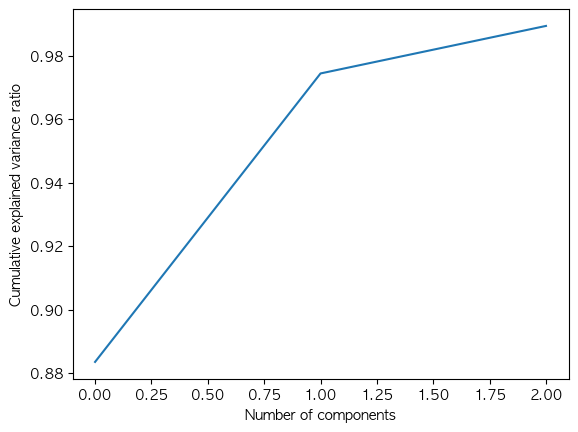

In [31]:
import numpy as np
# PCA 수행
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


### pca heatmap

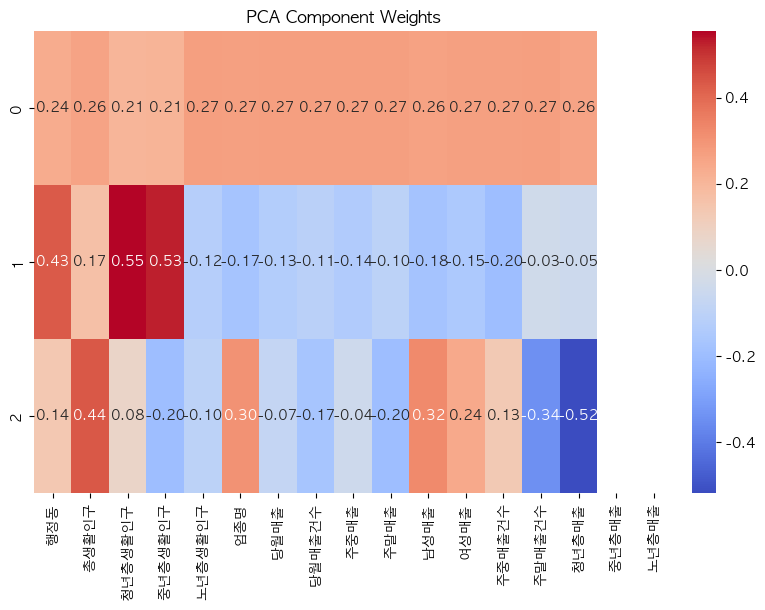

In [32]:

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [33]:
print(pca.components_)


[[ 0.23514053  0.25779172  0.20573125  0.21047166  0.27137801  0.26573327
   0.27127741  0.27098121  0.27093166  0.27072562  0.26475188  0.26784663
   0.26623583  0.26979104  0.26104756]
 [ 0.43194255  0.16737568  0.55446408  0.5281222  -0.12441453 -0.17092479
  -0.12880743 -0.11179618 -0.13743359 -0.10106663 -0.17707943 -0.15134514
  -0.19661172 -0.03406256 -0.04584964]
 [ 0.13665657  0.43619774  0.07864183 -0.19959755 -0.09944136  0.30411081
  -0.07472152 -0.16844831 -0.04215909 -0.1986327   0.32418563  0.24111966
   0.1347039  -0.34246336 -0.51846798]]


In [34]:
data

,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출
4,35414.592129,2138.137898,1087.947435,1001.271798,6.894431e+09,1435507,5.130392e+09,1.764039e+09,4.608076e+09,2.286355e+09,1088731,346776,4.367908e+09,2.050046e+09,422964768.0
10,17718.987732,918.453401,632.918150,641.068136,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0
16,43780.404901,2191.099495,1349.096171,1384.671735,9.163154e+09,1378877,6.688929e+09,2.474225e+09,5.811311e+09,3.341882e+09,1028355,350522,4.711874e+09,3.438503e+09,826564875.0
22,20403.718412,760.888892,760.197387,714.112982,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0
28,16516.393565,665.456764,595.564459,672.713470,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0
34,18707.006306,698.543446,681.121447,731.503520,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0
40,35234.993160,1719.288960,1103.227731,966.916628,2.615675e+09,441728,1.947476e+09,6.681995e+08,1.682842e+09,9.170397e+08,337485,104243,1.210895e+09,1.022134e+09,312658586.0
46,22714.892651,1187.683986,791.024475,782.488288,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0
52,31741.638882,1099.054708,1222.998539,1250.519451,2.191682e+09,331393,1.557031e+09,6.346505e+08,1.448307e+09,7.387270e+08,237877,93516,1.024837e+09,8.779903e+08,252015537.0
58,18666.811610,608.635897,701.916949,770.962451,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0


In [35]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

## 엘보우 포인트 / 실루엣 계수


/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

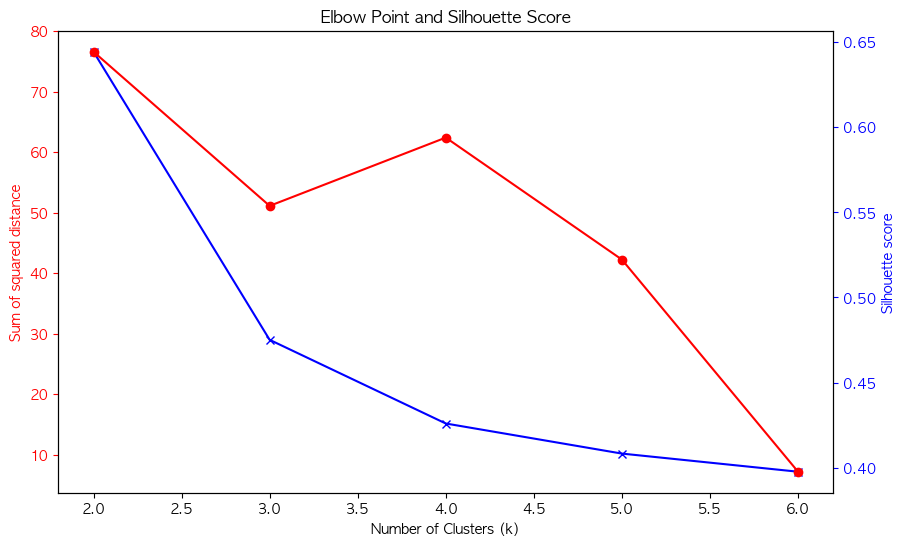

In [36]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

## K-MEANS

### 군집 개수 3으로 설정

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


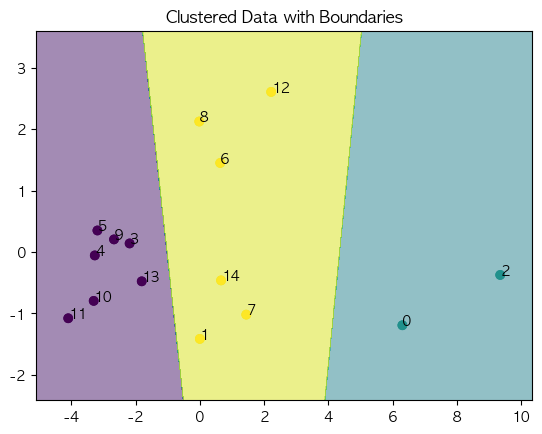

In [37]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


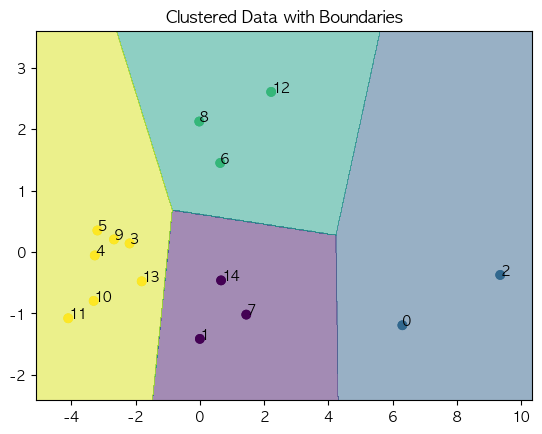

In [38]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

군집 개수 3개일 때 보라색 군집이 눈에딈 (보라 군집에는 노량진1동, 상도1동에 많이 거주함 

군집 3보다 4로 설정했을 때 군집이 더 잘 이루어진 것을 확인 가능함 -> 군집 내 거리는 가깝고, 군집간 거리는 멈


/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


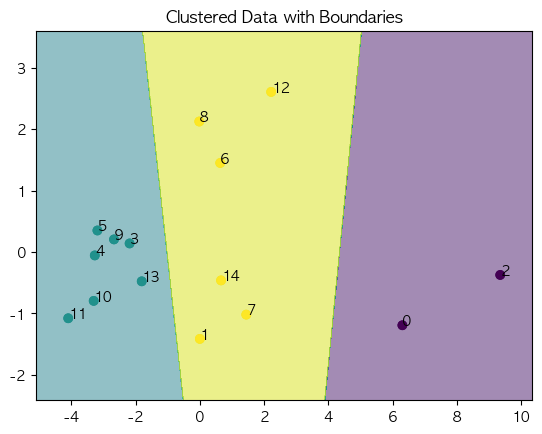

In [39]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [40]:
cluster_labels #=> 군집화 3으로 설정

array([0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2], dtype=int32)

In [41]:
df['kmeans_label']=cluster_labels
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label
4,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,편의점,6.894431e+09,1435507,5.130392e+09,1.764039e+09,4.608076e+09,2.286355e+09,1088731,346776,4.367908e+09,2.050046e+09,422964768.0,0
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,2
16,상도1동,43780.404901,2191.099495,1349.096171,1384.671735,편의점,9.163154e+09,1378877,6.688929e+09,2.474225e+09,5.811311e+09,3.341882e+09,1028355,350522,4.711874e+09,3.438503e+09,826564875.0,0
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,1
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,1
40,흑석동,35234.993160,1719.288960,1103.227731,966.916628,편의점,2.615675e+09,441728,1.947476e+09,6.681995e+08,1.682842e+09,9.170397e+08,337485,104243,1.210895e+09,1.022134e+09,312658586.0,2
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,2
52,사당2동,31741.638882,1099.054708,1222.998539,1250.519451,편의점,2.191682e+09,331393,1.557031e+09,6.346505e+08,1.448307e+09,7.387270e+08,237877,93516,1.024837e+09,8.779903e+08,252015537.0,2
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1


In [42]:
df['행정동'].value_counts()

행정동
노량진1동    1
노량진2동    1
상도1동     1
상도2동     1
상도3동     1
상도4동     1
흑석동      1
사당1동     1
사당2동     1
사당3동     1
사당4동     1
사당5동     1
대방동      1
신대방1동    1
신대방2동    1
Name: count, dtype: int64

## GMM(GaussianMixture)

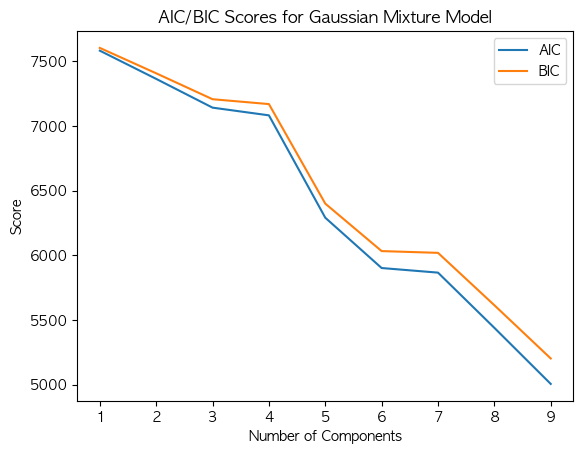

In [43]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0)
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(data)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(data)
    bic = model.bic(data)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

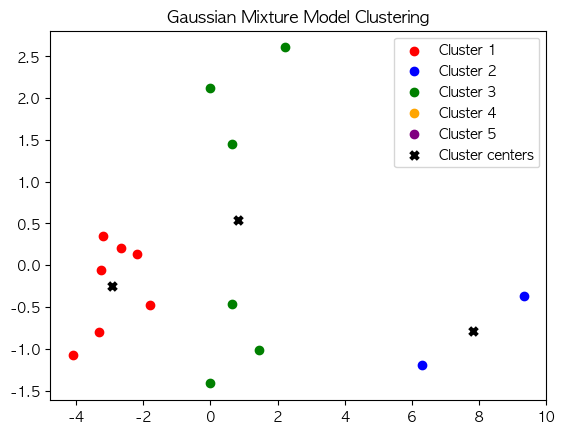

In [44]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=3, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()

for i in range(5):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

In [45]:
labels

array([1, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2])

In [46]:
df['gmm_labels']=labels
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels
4,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,편의점,6.894431e+09,1435507,5.130392e+09,1.764039e+09,4.608076e+09,2.286355e+09,1088731,346776,4.367908e+09,2.050046e+09,422964768.0,0,1
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,2,2
16,상도1동,43780.404901,2191.099495,1349.096171,1384.671735,편의점,9.163154e+09,1378877,6.688929e+09,2.474225e+09,5.811311e+09,3.341882e+09,1028355,350522,4.711874e+09,3.438503e+09,826564875.0,0,1
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,0
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,1,0
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,1,0
40,흑석동,35234.993160,1719.288960,1103.227731,966.916628,편의점,2.615675e+09,441728,1.947476e+09,6.681995e+08,1.682842e+09,9.170397e+08,337485,104243,1.210895e+09,1.022134e+09,312658586.0,2,2
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,2,2
52,사당2동,31741.638882,1099.054708,1222.998539,1250.519451,편의점,2.191682e+09,331393,1.557031e+09,6.346505e+08,1.448307e+09,7.387270e+08,237877,93516,1.024837e+09,8.779903e+08,252015537.0,2,2
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0


# PAM

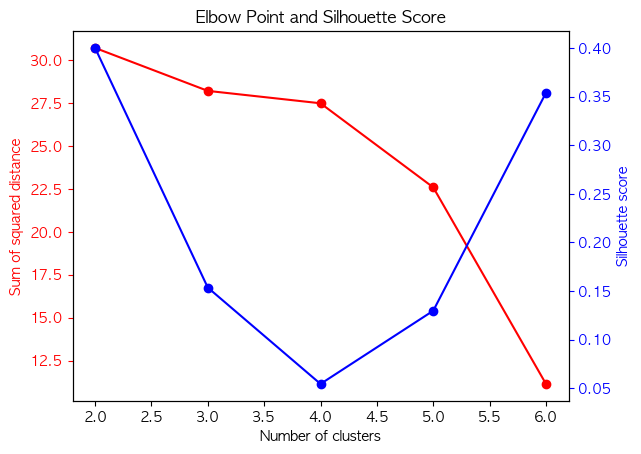

In [47]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

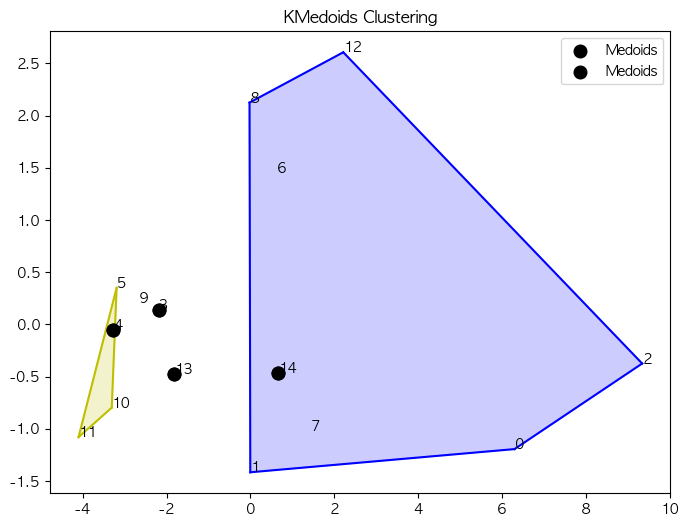

In [48]:

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=4, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                    [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
        ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
        
        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()


In [49]:
df['y_kmedoids']=y_kmedoids
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
4,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,편의점,6.894431e+09,1435507,5.130392e+09,1.764039e+09,4.608076e+09,2.286355e+09,1088731,346776,4.367908e+09,2.050046e+09,422964768.0,0,1,2
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,2,2,2
16,상도1동,43780.404901,2191.099495,1349.096171,1384.671735,편의점,9.163154e+09,1378877,6.688929e+09,2.474225e+09,5.811311e+09,3.341882e+09,1028355,350522,4.711874e+09,3.438503e+09,826564875.0,0,1,2
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,0,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,1,0,3
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,1,0,3
40,흑석동,35234.993160,1719.288960,1103.227731,966.916628,편의점,2.615675e+09,441728,1.947476e+09,6.681995e+08,1.682842e+09,9.170397e+08,337485,104243,1.210895e+09,1.022134e+09,312658586.0,2,2,2
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,2,2,2
52,사당2동,31741.638882,1099.054708,1222.998539,1250.519451,편의점,2.191682e+09,331393,1.557031e+09,6.346505e+08,1.448307e+09,7.387270e+08,237877,93516,1.024837e+09,8.779903e+08,252015537.0,2,2,2
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0,1


노량진1동 : 노량진 수상시장인 인접했음 (지하철역은 노량진역(1호선, 9호선), 노들역 (9호선)위치했음)
상도1동 : 중앙대학교와 숭실대학교가 인접했음 (지하철역은 상도역(7호선) 위치함)

결론 : 노량진 1동과 상도 1동은 대학가와 상권이 발달한 지하철역이 위치했으므로 이미 많은 상권이 위치했을 것이고 상권이 입점하기에는 상당한 임대료가 지출될 수 가능성이 있음. 

=> 노량진1동과 상도1동은 연구에서 배제하고 진행

In [50]:
df=df[df['행정동']!='노량진1동'] #노량진1동은 제거
df=df[df['행정동']!='상도1동'] #노량진1동은 제거

In [51]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,2,2,2
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,0,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,1,0,3
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,1,0,3
40,흑석동,35234.993160,1719.288960,1103.227731,966.916628,편의점,2.615675e+09,441728,1.947476e+09,6.681995e+08,1.682842e+09,9.170397e+08,337485,104243,1.210895e+09,1.022134e+09,312658586.0,2,2,2
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,2,2,2
52,사당2동,31741.638882,1099.054708,1222.998539,1250.519451,편의점,2.191682e+09,331393,1.557031e+09,6.346505e+08,1.448307e+09,7.387270e+08,237877,93516,1.024837e+09,8.779903e+08,252015537.0,2,2,2
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0,1
64,사당4동,13388.102227,560.278601,493.586097,535.919149,편의점,9.868127e+08,149834,7.096808e+08,2.771319e+08,6.497399e+08,3.123710e+08,109981,39853,5.179274e+08,3.573464e+08,76124518.0,1,0,3
70,사당5동,11030.549943,416.485585,408.513714,409.066296,편의점,5.009755e+08,80313,3.569815e+08,1.439940e+08,3.065022e+08,1.911846e+08,58513,21800,2.413977e+08,1.696164e+08,77646198.0,1,0,3


# 재진행

In [52]:
selected_columns = ['총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '당월매출', '당월매출건수', '주중매출', '주말매출', 
                    '남성매출', '여성매출', '주중매출건수', '주말매출건수', '청년층매출', '중년층매출', '노년층매출']
data = df[selected_columns]

In [53]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Transformed data shape: (13, 5)
Transformed data:
 [[ 2.76161777 -2.25107376  0.533429    0.50492121 -0.09492472]
 [-1.81191542  0.24407137  0.05618854  0.04250463 -0.07510245]
 [-3.73888903  0.29092575 -0.02068831 -0.12580815  0.14405959]
 [-3.7369076   0.77254814 -0.15171498 -0.1912411   0.09298768]
 [ 2.80128081  1.62902646  1.42887821 -0.32269063 -0.04113043]]
Explained variance ratio: [0.83333635 0.13587266 0.01708474 0.00775095 0.00328995]
cumulative_variance_ratio: [0.83333635 0.96920902 0.98629376 0.99404471 0.99733466]


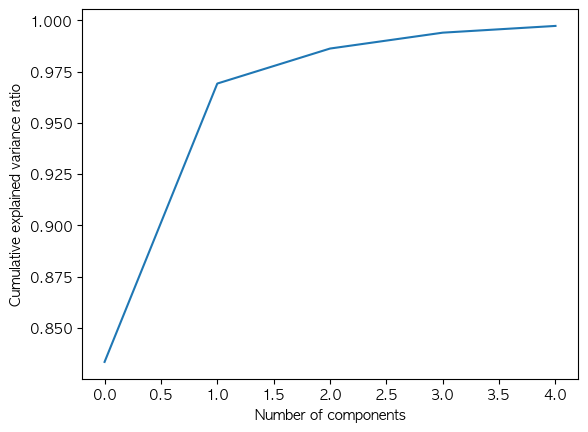

In [54]:

# PCA 수행
pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print('cumulative_variance_ratio:', cumulative_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


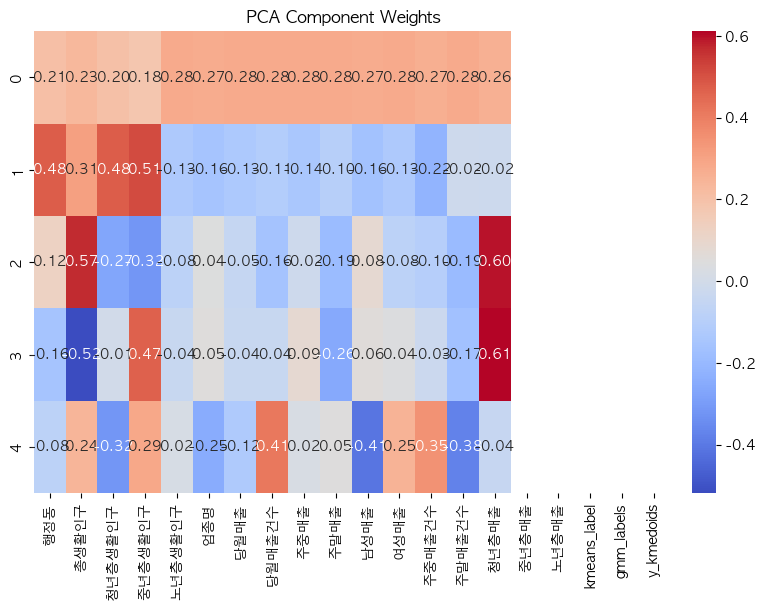

In [55]:
rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [56]:
print(pca.components_)


[[ 0.20596433  0.23451206  0.20246113  0.18076103  0.27790721  0.27472633
   0.27747939  0.27699421  0.27654318  0.27684685  0.27302169  0.2764156
   0.26738857  0.27938217  0.26243547]
 [ 0.47612981  0.30871501  0.47567472  0.51179741 -0.12570416 -0.15505797
  -0.13051642 -0.11109163 -0.14130931 -0.09524904 -0.16328015 -0.12763615
  -0.21848783 -0.01837974 -0.02247628]
 [ 0.12411669  0.56917323 -0.26956891 -0.31728699 -0.07737917  0.04346758
  -0.04836701 -0.15908416 -0.01729197 -0.18891643  0.08298977 -0.0792039
  -0.09936492 -0.19225658  0.59648083]
 [-0.15623397 -0.51854804 -0.00608393  0.46750097 -0.0378915   0.05435962
  -0.03759011 -0.03845649  0.0858509  -0.25622987  0.05820047  0.0417853
  -0.02674447 -0.16630099  0.61179518]
 [-0.07780332  0.24435001 -0.31843423  0.28874056  0.01583805 -0.24890969
  -0.12446405  0.41370355  0.02414198  0.04992902 -0.41050233  0.25357864
   0.34772158 -0.37678059 -0.04307567]]


In [57]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

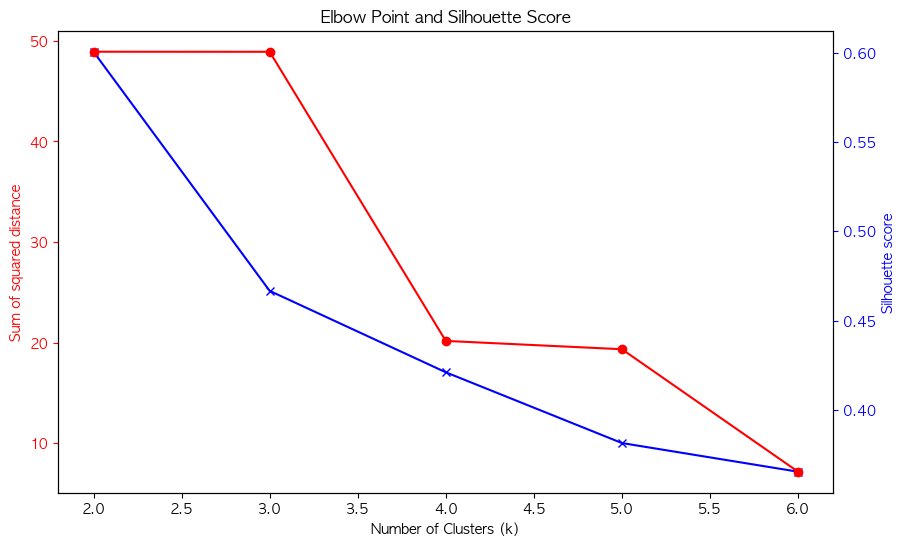

In [58]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


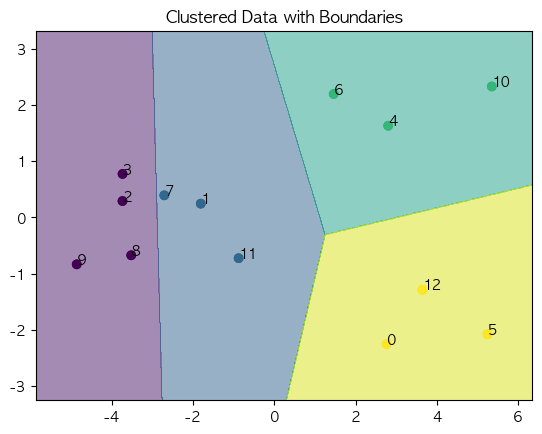

In [59]:

# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [60]:
cluster_labels

array([3, 1, 0, 0, 2, 3, 2, 1, 0, 0, 2, 1, 3], dtype=int32)

In [61]:
df['kmeans_label']=cluster_labels
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,3,2,2
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,0,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,0,0,3
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,0,0,3
40,흑석동,35234.993160,1719.288960,1103.227731,966.916628,편의점,2.615675e+09,441728,1.947476e+09,6.681995e+08,1.682842e+09,9.170397e+08,337485,104243,1.210895e+09,1.022134e+09,312658586.0,2,2,2
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,3,2,2
52,사당2동,31741.638882,1099.054708,1222.998539,1250.519451,편의점,2.191682e+09,331393,1.557031e+09,6.346505e+08,1.448307e+09,7.387270e+08,237877,93516,1.024837e+09,8.779903e+08,252015537.0,2,2,2
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0,1
64,사당4동,13388.102227,560.278601,493.586097,535.919149,편의점,9.868127e+08,149834,7.096808e+08,2.771319e+08,6.497399e+08,3.123710e+08,109981,39853,5.179274e+08,3.573464e+08,76124518.0,0,0,3
70,사당5동,11030.549943,416.485585,408.513714,409.066296,편의점,5.009755e+08,80313,3.569815e+08,1.439940e+08,3.065022e+08,1.911846e+08,58513,21800,2.413977e+08,1.696164e+08,77646198.0,0,0,3


노량진1동과 상도1동을 배제했으며 k개수를 4로 설정했음 

이번 결과에서는 파란색 군집이 가장 높은 값을 가진 군집임(4=흑석동, 6=사당2동, 10=대방동)

흑성동 : 중앙대학교와 흑석역이 위치, 아파트단지와 빌라촌이 공존함

사당2동 : 이수역/총신대입구역 (4호선, 7호선), 남성사계시장, 이수역 먹자골목이 위치함

대방동 : 신대방3거리역(7호선), 보라매역(1호선, 7호선), 서울지방병무청역(1호선), 대방역(1호선), 용마산공원, 아파트단지와 빌라촌 위치함


/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


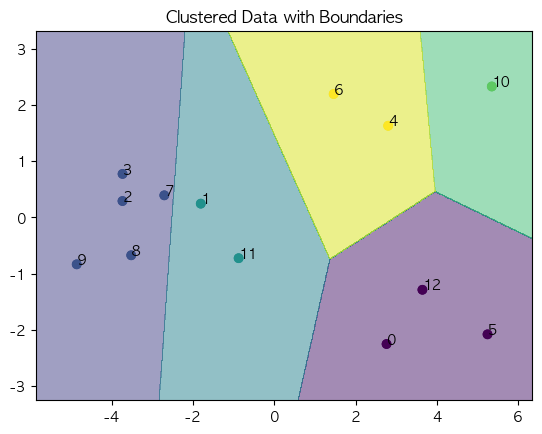

In [62]:

# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [63]:
cluster_labels

array([0, 2, 1, 1, 4, 0, 4, 1, 1, 1, 3, 2, 0], dtype=int32)

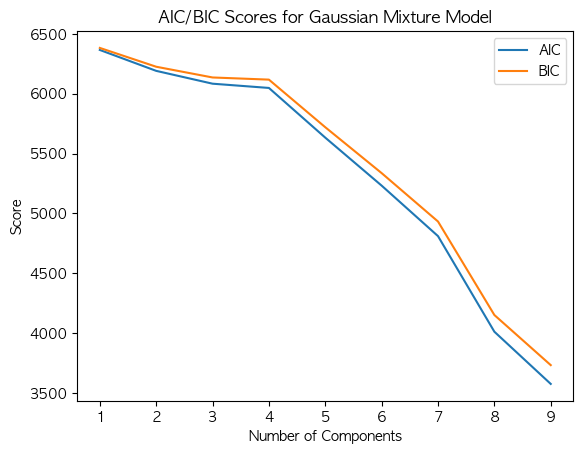

In [64]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0)
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(data)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(data)
    bic = model.bic(data)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

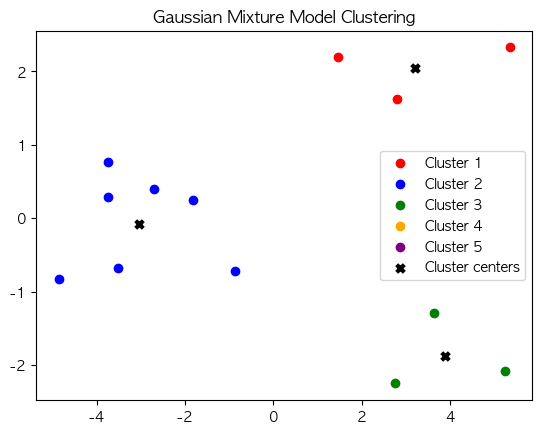

In [65]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=3, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()

for i in range(5):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

In [66]:
labels

array([2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2])

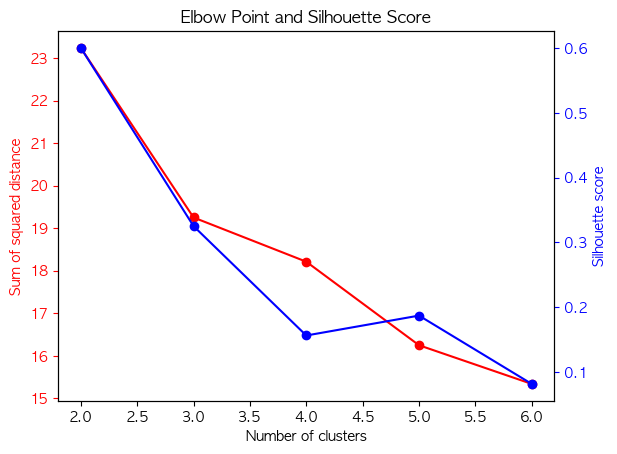

In [67]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

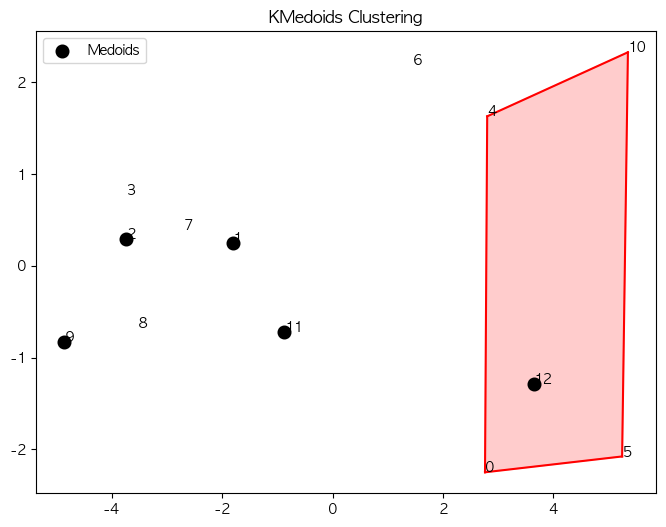

In [68]:


# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=5, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                    [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
        ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
        
        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()


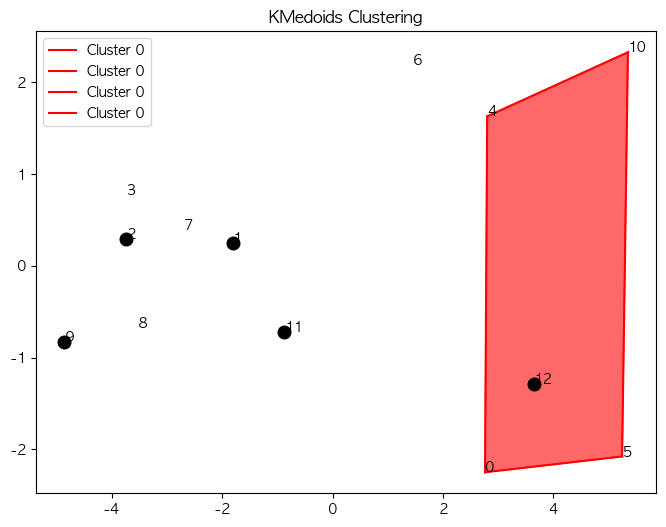

In [69]:
from scipy.spatial import ConvexHull
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assume X_pca is your data
# ...

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=5, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list to store Line2D objects for the legend
legend_lines = []

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            line = ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                           [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
            ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
            
            # Append Line2D object to the legend_lines list
            legend_lines.append(Line2D([0], [0], color=colors[i], label=f'Cluster {i}'))

        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title
ax.set_title('KMedoids Clustering')

# Add legend with custom lines
ax.legend(handles=legend_lines)

# Show the plot
plt.show()


In [70]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,3,2,2
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,0,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,0,0,3
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,0,0,3
40,흑석동,35234.993160,1719.288960,1103.227731,966.916628,편의점,2.615675e+09,441728,1.947476e+09,6.681995e+08,1.682842e+09,9.170397e+08,337485,104243,1.210895e+09,1.022134e+09,312658586.0,2,2,2
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,3,2,2
52,사당2동,31741.638882,1099.054708,1222.998539,1250.519451,편의점,2.191682e+09,331393,1.557031e+09,6.346505e+08,1.448307e+09,7.387270e+08,237877,93516,1.024837e+09,8.779903e+08,252015537.0,2,2,2
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0,1
64,사당4동,13388.102227,560.278601,493.586097,535.919149,편의점,9.868127e+08,149834,7.096808e+08,2.771319e+08,6.497399e+08,3.123710e+08,109981,39853,5.179274e+08,3.573464e+08,76124518.0,0,0,3
70,사당5동,11030.549943,416.485585,408.513714,409.066296,편의점,5.009755e+08,80313,3.569815e+08,1.439940e+08,3.065022e+08,1.911846e+08,58513,21800,2.413977e+08,1.696164e+08,77646198.0,0,0,3


앞서 나온 3개동 - 흑석동, 대방동, 사당2동을 제외하고 다시 진행해봄

# 3차진행

In [71]:
df=df[df['행정동']!='흑석동'] #동선동은 제거

In [72]:
df=df[df['행정동']!='대방동'] #동선동은 제거
df=df[df['행정동']!='사당2동'] #동선동은 제거

In [73]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,3,2,2
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,0,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,0,0,3
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,0,0,3
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,3,2,2
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0,1
64,사당4동,13388.102227,560.278601,493.586097,535.919149,편의점,9.868127e+08,149834,7.096808e+08,2.771319e+08,6.497399e+08,3.123710e+08,109981,39853,5.179274e+08,3.573464e+08,76124518.0,0,0,3
70,사당5동,11030.549943,416.485585,408.513714,409.066296,편의점,5.009755e+08,80313,3.569815e+08,1.439940e+08,3.065022e+08,1.911846e+08,58513,21800,2.413977e+08,1.696164e+08,77646198.0,0,0,3
82,신대방1동,17750.753160,667.174431,716.671890,656.417527,편의점,1.852204e+09,306496,1.312080e+09,5.401246e+08,1.103524e+09,7.486806e+08,223164,83332,1.029758e+09,6.861802e+08,117345033.0,1,0,0
88,신대방2동,23050.804553,956.484514,907.968876,793.250846,편의점,3.535695e+09,578977,2.669442e+09,8.662526e+08,2.277690e+09,1.227319e+09,448471,130506,1.802667e+09,1.406650e+09,258210591.0,3,2,2


In [74]:

# 필요한 열 선택
selected_columns = ['총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '당월매출', '당월매출건수', '주중매출', '주말매출', 
                    '남성매출', '여성매출', '주중매출건수', '주말매출건수', '청년층매출', '중년층매출', '노년층매출']
data = df[selected_columns]



In [75]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


Transformed data shape: (10, 3)
Transformed data:
 [[ 3.61586200e+00  1.78843665e+00 -3.15784748e-01]
 [-5.94885715e-01 -1.28000057e+00 -3.46369276e-03]
 [-2.82782616e+00 -5.61093555e-01 -3.99098449e-01]
 [-2.60437092e+00 -1.56812733e+00 -3.24245384e-01]
 [ 6.59769723e+00  3.41411703e-01 -4.96821365e-01]]
Explained variance ratio: [0.86891727 0.10871204 0.01005396]


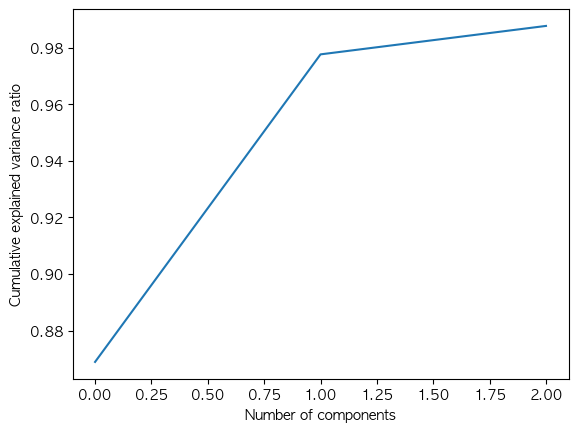

In [76]:
# PCA 수행
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


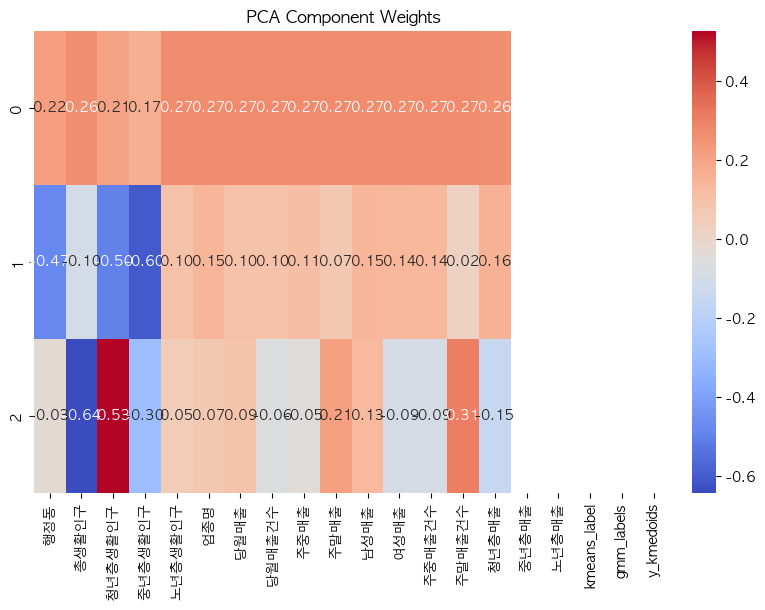

In [77]:

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [78]:
print(pca.components_)


[[ 0.21897619  0.26324736  0.20557888  0.16857514  0.27451641  0.27097449
   0.27442743  0.27285426  0.27379366  0.27238045  0.26999778  0.27120334
   0.27196846  0.27369015  0.26276689]
 [-0.47454351 -0.10022523 -0.49697424 -0.6027139   0.09917875  0.14526043
   0.0980232   0.10179265  0.11401963  0.0700337   0.14561964  0.14260403
   0.13524387  0.02136291  0.15942132]
 [-0.02945102 -0.64364445  0.52736168 -0.29761691  0.05289053  0.074003
   0.09362345 -0.06402948 -0.04687497  0.21492234  0.12691898 -0.09335627
  -0.09281811  0.30633431 -0.14615303]]


In [79]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

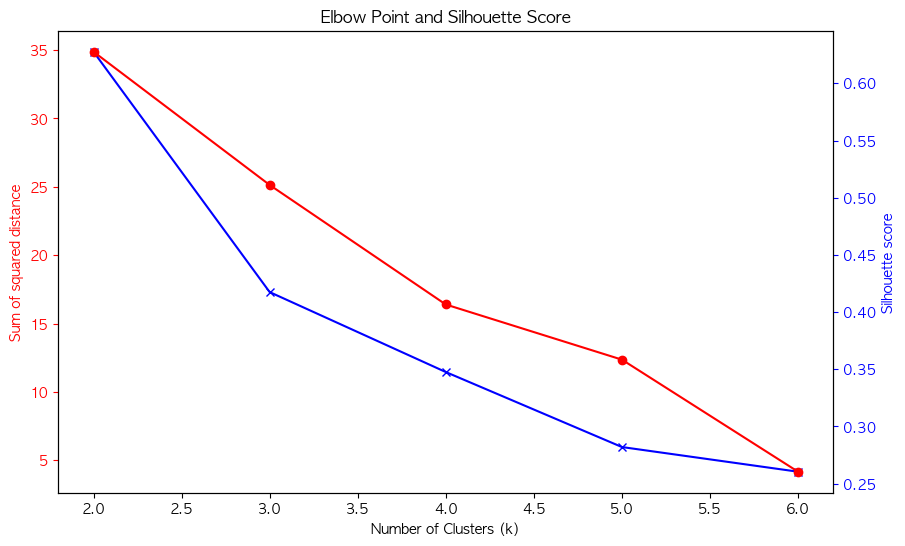

In [80]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


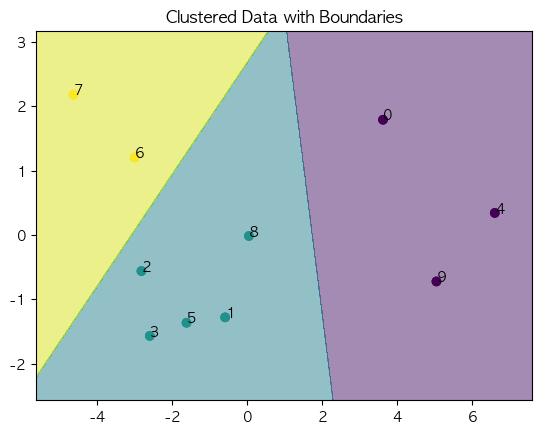

In [81]:

# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [82]:
df 
df['kmeans_label']=cluster_labels
#df[df['kmeans_label']==0]
df
#사당4동, 사당5동은 1번 군집(초록색) 
#상도2동, 상도3동, 상도4동, 사당3동, 신대방1동은 2번 군집(노란색)
#노량진2동, 사당1동, 신대방2동은 0번 군집(보라색)

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,0,2,2
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,0,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,1,0,3
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,1,0,3
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,0,2,2
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0,1
64,사당4동,13388.102227,560.278601,493.586097,535.919149,편의점,9.868127e+08,149834,7.096808e+08,2.771319e+08,6.497399e+08,3.123710e+08,109981,39853,5.179274e+08,3.573464e+08,76124518.0,2,0,3
70,사당5동,11030.549943,416.485585,408.513714,409.066296,편의점,5.009755e+08,80313,3.569815e+08,1.439940e+08,3.065022e+08,1.911846e+08,58513,21800,2.413977e+08,1.696164e+08,77646198.0,2,0,3
82,신대방1동,17750.753160,667.174431,716.671890,656.417527,편의점,1.852204e+09,306496,1.312080e+09,5.401246e+08,1.103524e+09,7.486806e+08,223164,83332,1.029758e+09,6.861802e+08,117345033.0,1,0,0
88,신대방2동,23050.804553,956.484514,907.968876,793.250846,편의점,3.535695e+09,578977,2.669442e+09,8.662526e+08,2.277690e+09,1.227319e+09,448471,130506,1.802667e+09,1.406650e+09,258210591.0,0,2,2


보란색 군집 분석
노량진 2동 : 노량진수산물 시장, 동작구청, 노량진역(1,9호선)이 위치함<br>
사당 1동 : 사당역, 이수역, 총신대입구역이 위치함<br>
신대방2동 : 보라매공원역, 보라매병원역, 신대방삼거리역, 보라매역, 종합상가, 공원이 위치함<br>

In [83]:
cluster_labels

array([0, 1, 1, 1, 0, 1, 2, 2, 1, 0], dtype=int32)

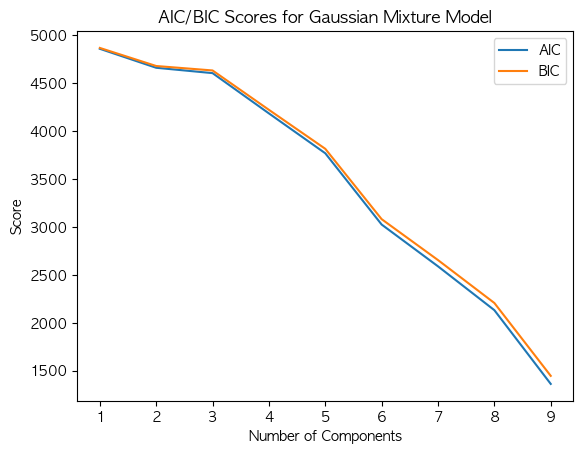

In [84]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0)
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(data)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(data)
    bic = model.bic(data)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

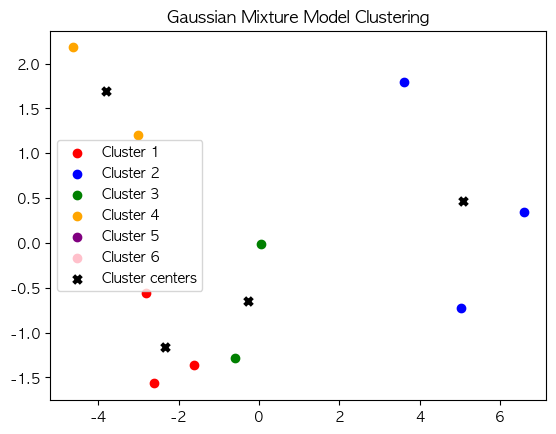

In [85]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=4, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple','pink']

fig, ax = plt.subplots()

for i in range(6):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

In [86]:
labels

array([1, 2, 0, 0, 1, 0, 3, 3, 2, 1])

In [87]:
df['gmm_labels']=labels
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,0,1,2
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,2,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,1,0,3
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,1,0,3
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,0,1,2
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0,1
64,사당4동,13388.102227,560.278601,493.586097,535.919149,편의점,9.868127e+08,149834,7.096808e+08,2.771319e+08,6.497399e+08,3.123710e+08,109981,39853,5.179274e+08,3.573464e+08,76124518.0,2,3,3
70,사당5동,11030.549943,416.485585,408.513714,409.066296,편의점,5.009755e+08,80313,3.569815e+08,1.439940e+08,3.065022e+08,1.911846e+08,58513,21800,2.413977e+08,1.696164e+08,77646198.0,2,3,3
82,신대방1동,17750.753160,667.174431,716.671890,656.417527,편의점,1.852204e+09,306496,1.312080e+09,5.401246e+08,1.103524e+09,7.486806e+08,223164,83332,1.029758e+09,6.861802e+08,117345033.0,1,2,0
88,신대방2동,23050.804553,956.484514,907.968876,793.250846,편의점,3.535695e+09,578977,2.669442e+09,8.662526e+08,2.277690e+09,1.227319e+09,448471,130506,1.802667e+09,1.406650e+09,258210591.0,0,1,2


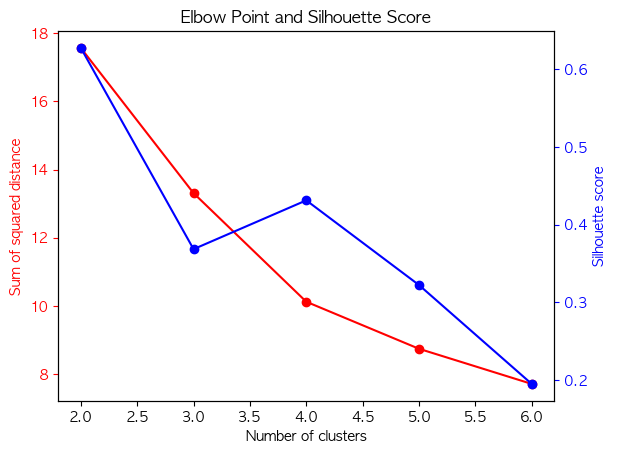

In [88]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

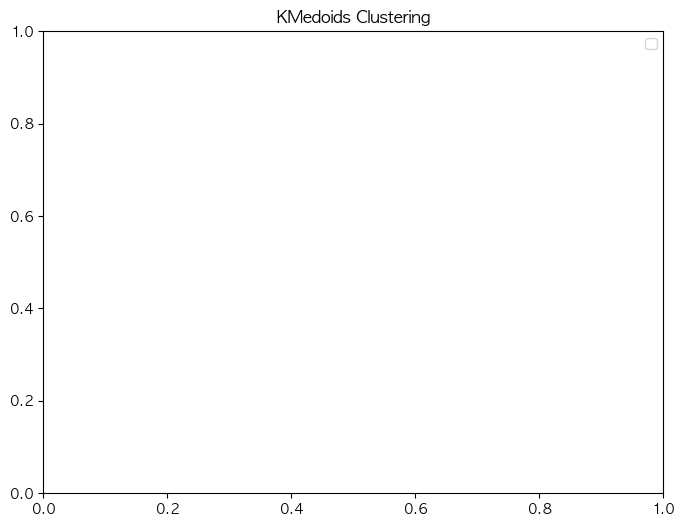

In [89]:
from scipy.spatial import ConvexHull
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assume X_pca is your data
# ...

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=4, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list to store Line2D objects for the legend
legend_lines = []

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 4:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            line = ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                           [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
            ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
            
            # Append Line2D object to the legend_lines list
            legend_lines.append(Line2D([0], [0], color=colors[i], label=f'Cluster {i}'))

        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title
ax.set_title('KMedoids Clustering')

# Add legend with custom lines
ax.legend(handles=legend_lines)

# Show the plot
plt.show()


In [90]:
df['y_kmedoids']=y_kmedoids
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,0,1,0
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,2,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,1,0,2
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,1,0,2
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,0,1,0
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0,2
64,사당4동,13388.102227,560.278601,493.586097,535.919149,편의점,9.868127e+08,149834,7.096808e+08,2.771319e+08,6.497399e+08,3.123710e+08,109981,39853,5.179274e+08,3.573464e+08,76124518.0,2,3,3
70,사당5동,11030.549943,416.485585,408.513714,409.066296,편의점,5.009755e+08,80313,3.569815e+08,1.439940e+08,3.065022e+08,1.911846e+08,58513,21800,2.413977e+08,1.696164e+08,77646198.0,2,3,3
82,신대방1동,17750.753160,667.174431,716.671890,656.417527,편의점,1.852204e+09,306496,1.312080e+09,5.401246e+08,1.103524e+09,7.486806e+08,223164,83332,1.029758e+09,6.861802e+08,117345033.0,1,2,1
88,신대방2동,23050.804553,956.484514,907.968876,793.250846,편의점,3.535695e+09,578977,2.669442e+09,8.662526e+08,2.277690e+09,1.227319e+09,448471,130506,1.802667e+09,1.406650e+09,258210591.0,0,1,0


# KMEANS / GMM / PAM 군집화 결과 비교

In [91]:
clustering_result=df[['행정동','kmeans_label','gmm_labels','y_kmedoids']]
clustering_result

,행정동,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,0,1,0
22,상도2동,1,2,1
28,상도3동,1,0,2
34,상도4동,1,0,2
46,사당1동,0,1,0
58,사당3동,1,0,2
64,사당4동,2,3,3
70,사당5동,2,3,3
82,신대방1동,1,2,1
88,신대방2동,0,1,0


In [92]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3.172713e+09,599169,2.355001e+09,8.177120e+08,2.211776e+09,9.609369e+08,455943,143226,1.812610e+09,1.010686e+09,303054534.0,0,1,0
22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1.399927e+09,216234,1.025021e+09,3.749055e+08,9.390922e+08,4.585849e+08,160158,56076,7.034988e+08,5.333879e+08,141611571.0,1,2,1
28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,7.515386e+08,105285,5.253024e+08,2.262362e+08,4.988553e+08,2.526833e+08,73759,31526,3.665641e+08,3.026838e+08,71131057.0,1,0,2
34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,6.882036e+08,95361,4.819978e+08,2.062058e+08,4.555736e+08,2.326299e+08,67092,28269,3.220243e+08,3.065736e+08,56228726.0,1,0,2
46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4.176317e+09,646668,3.013558e+09,1.162759e+09,2.700218e+09,1.469805e+09,472843,173825,2.437419e+09,1.400663e+09,299242733.0,0,1,0
58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1.070378e+09,168278,7.784647e+08,2.919128e+08,6.733363e+08,3.859434e+08,123820,44458,4.950938e+08,4.199431e+08,122786982.0,1,0,2
64,사당4동,13388.102227,560.278601,493.586097,535.919149,편의점,9.868127e+08,149834,7.096808e+08,2.771319e+08,6.497399e+08,3.123710e+08,109981,39853,5.179274e+08,3.573464e+08,76124518.0,2,3,3
70,사당5동,11030.549943,416.485585,408.513714,409.066296,편의점,5.009755e+08,80313,3.569815e+08,1.439940e+08,3.065022e+08,1.911846e+08,58513,21800,2.413977e+08,1.696164e+08,77646198.0,2,3,3
82,신대방1동,17750.753160,667.174431,716.671890,656.417527,편의점,1.852204e+09,306496,1.312080e+09,5.401246e+08,1.103524e+09,7.486806e+08,223164,83332,1.029758e+09,6.861802e+08,117345033.0,1,2,1
88,신대방2동,23050.804553,956.484514,907.968876,793.250846,편의점,3.535695e+09,578977,2.669442e+09,8.662526e+08,2.277690e+09,1.227319e+09,448471,130506,1.802667e+09,1.406650e+09,258210591.0,0,1,0


In [93]:
kmeans=clustering_result.sort_values(by='kmeans_label',ascending=True)
kmeans

,행정동,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,0,1,0
46,사당1동,0,1,0
88,신대방2동,0,1,0
22,상도2동,1,2,1
28,상도3동,1,0,2
34,상도4동,1,0,2
58,사당3동,1,0,2
82,신대방1동,1,2,1
64,사당4동,2,3,3
70,사당5동,2,3,3


In [94]:
gmm=clustering_result.sort_values(by='gmm_labels',ascending=True)
gmm

,행정동,kmeans_label,gmm_labels,y_kmedoids
28,상도3동,1,0,2
34,상도4동,1,0,2
58,사당3동,1,0,2
10,노량진2동,0,1,0
46,사당1동,0,1,0
88,신대방2동,0,1,0
22,상도2동,1,2,1
82,신대방1동,1,2,1
64,사당4동,2,3,3
70,사당5동,2,3,3


In [95]:
pam=clustering_result.sort_values(by='y_kmedoids',ascending=True)
pam

,행정동,kmeans_label,gmm_labels,y_kmedoids
10,노량진2동,0,1,0
46,사당1동,0,1,0
88,신대방2동,0,1,0
22,상도2동,1,2,1
82,신대방1동,1,2,1
28,상도3동,1,0,2
34,상도4동,1,0,2
58,사당3동,1,0,2
64,사당4동,2,3,3
70,사당5동,2,3,3
